Lowest three eigen states :
E1 =  1.2337005501361697
E2 =  4.934802200544679
E3 =  11.103304951225528


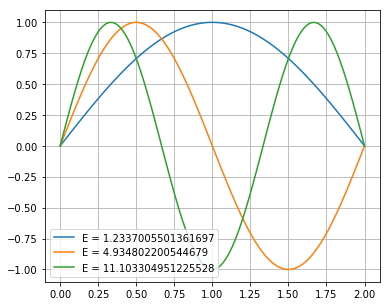

In [38]:
"""--------------------------------------------------------------*
Solution of Shrodinger Equation for the hard wall potential :

-0.5*Psi'' = E*Psi (inside the potential well) -----(1)

where 

V = 0         for  x in [0,L]
V = Infinity   ortherwise

Below are the exact solutions :

Psi_n(x) = sqrt(2/L)*sin(n*w*x) see below ...

E_n = (n**2)*E0  see below ...

-----------------------------------------------------------------*
"""


import numpy as np
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------#
#                 plane waves solutions of the hard wall potential
#--------------------------------------------------------------------------------------#
L  = 2.0
w  = np.pi/L
A  = math.sqrt(2/L)
E0 = 0.5*w**2

def psi(n):
    def tmpFunc(x):       
        return (A*math.sin(n*w*x))
    return(tmpFunc)

def E(n):
    return ((n**2)*E0)

x  = np.linspace(0,L,100) 
y1 = [ psi(1)(t) for t in x]
y2 = [ psi(2)(t) for t in x]
y3 = [ psi(3)(t) for t in x]

print("Lowest three eigen states :")
print("E1 = ",str(E(1)))
print("E2 = ",str(E(2)))
print("E3 = ",str(E(3)))

plt.figure(figsize=[6,5])
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(('E = '+str(E(1)),'E = '+str(E(2)),'E = '+str(E(3))))
plt.grid()
plt.show()


Lowest three eigen states :
E1 =  1.23367518339
E2 =  4.93439634269
E3 =  11.1012503803


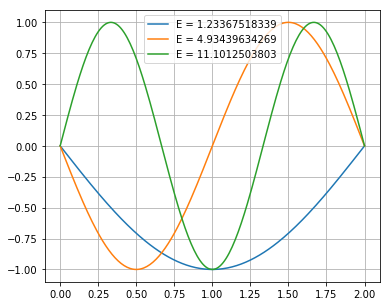

In [35]:
#-------------------------------------------------------------------------------#
#
# Matrix, finite difference solution for the hardwall potential(see above)
#
#-------------------------------------------------------------------------------# 
#%reset

import numpy as np
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

N  = 200
L  = 2.0 
dx = L/N

c = 2.0*(dx**2) # factor comes from Shrodinger equation 

N_1 = N-1

#  we will populate   elements corresponding to Psi_1 .... Psi_(N-1)
#  given that Psi_0 = Psi_N = 0.0
# i.e  i in [0,..N-2] as arrays start from 0 

A = np.zeros([N_1,N_1])

# forming the tridiagonal matrix
#  Psi_i  means Psi(x_i)
#
#  -Psi_0 + 2*Psi_1 - Psi_2            = E Psi_1
#         ....
#     0   - Psi_(N-2)+ 2*Psi_(N-1) -Psi_(N) = E Psi_(N-1)
# by taking Psi_0 and Psi_(N) out of the system (because of boundary condition)

for i in range(N_1):
    A[i,i]=2.0
    if (i<N_1-1):
        A[i,i+1] = A[i+1,i] =-1.0
        
eigenValues, eigenVectors = np.linalg.eig(A)

idx = eigenValues.argsort()

# Eigens states are column vectors of eigenVectors
EigenEnergy = eigenValues[idx]/c # c from the calculation
Psi         = eigenVectors[:,idx]

# adding the boundary conditions psi(0)=psi(N)=0
ziltch = np.zeros([1,N_1])
Psi = np.concatenate((ziltch,Psi), axis=0)
Psi = np.concatenate((Psi,ziltch), axis=0)


# Normalise wave functions(eigen states)
def normalise():
    for i in range(Psi.shape[1]):
        d = Psi[:,i]**2
        S = integrate.simps(d, dx = dx)
        Psi[:,i] = Psi[:,i]/math.sqrt(S)
normalise()

xa = np.linspace(0,L,N+1) # gives a dx = L/N 

print("Lowest three eigen states :")
print("E1 = ",EigenEnergy[0])
print("E2 = ",EigenEnergy[1])
print("E3 = ",EigenEnergy[2])

plt.figure(figsize=[6,5])
plt.plot(xa,Psi[:,0])
plt.plot(xa,Psi[:,1])
plt.plot(xa,Psi[:,2])
plt.legend(('E = '+str(EigenEnergy[0]),'E = '+str(EigenEnergy[1]),'E = '+str(EigenEnergy[2])))
plt.grid()
plt.show()

In [36]:
"""
Here we use the above method as a function of the number of latice point N
and see how the accuracy increase as N increases..
"""

import numpy as np
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

L    = 2.0
Res  =[]
M = []
for N in range(200,1200,200):
    print("N=",N)
    M.append(N)
    dx   = L/N
    c    = 2.0*(dx**2) 
    N_1  = N-1
    A    = np.zeros([N_1,N_1])
    #-------------------------------------------------
    for i in range(N_1):
        A[i,i]=2.0
        if (i<N_1-1):
            A[i,i+1] = A[i+1,i] =-1.0
    #--------------------------------------------------
    eigenValues, eigenVectors = np.linalg.eig(A)
    idx = eigenValues.argsort()
    EigenEnergy = eigenValues[idx]/c 
    Res.append(EigenEnergy[0:10])
    
def E(n):
    w  = np.pi/L
    E0 = 0.5*w**2
    return ((n**2)*E0)

Exact = [E(i) for i in range(1,11)]

Res.append(Exact)

Res_tr = [list(i) for i in zip(*Res)]

import pandas as pd

L = ["N = "+str(r) for r in M]
L.append('Exact')
ColNames = L
Tab = pd.DataFrame(Res_tr, columns= ColNames )
S= (["E(n = "+str(i+1)+")" for i in range(10)])
Tab.index = S
Tab

N= 200
N= 400
N= 600
N= 800
N= 1000


,N = 200,N = 400,N = 600,N = 800,N = 1000,Exact
E(n = 1),1.233675,1.233694,1.233698,1.233699,1.233700,1.233701
E(n = 2),4.934396,4.934701,4.934757,4.934777,4.934786,4.934802
E(n = 3),11.101250,11.102791,11.103077,11.103177,11.103223,11.103305
E(n = 4),19.732716,19.737585,19.738487,19.738803,19.738949,19.739209
E(n = 5),30.826663,30.838550,30.840752,30.841523,30.841880,30.842514
E(n = 6),44.380354,44.405002,44.409567,44.411165,44.411905,44.413220
E(n = 7),60.390445,60.436102,60.444560,60.447520,60.448891,60.451327
E(n = 8),78.852987,78.930863,78.945291,78.950341,78.952679,78.956835
E(n = 9),99.763423,99.888143,99.911253,99.919343,99.923087,99.929745
E(n = 10),123.116594,123.306651,123.341872,123.354201,123.359909,123.370055


1.233700465609852
4.934803481559232
11.103308503022447


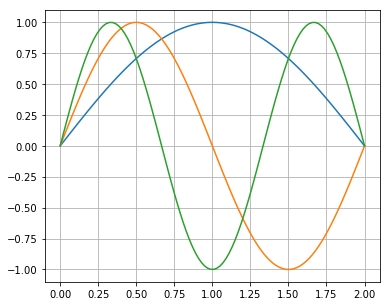

In [3]:
"""
Using the scipy ODE solver odeint

The problem 

-0.5*Psi'' = E*Psi

should be formulates as 

Psi' = z
                     ------- (2)
z'   = -2*E*psi

This the shooting method.. E is tuned so as to make Psi(L)=0

"""
import  numpy as np
import  matplotlib.pyplot  as plt        
from    scipy.integrate import odeint
from    scipy.integrate import simps
from    scipy.optimize  import brentq

"""
This  function provides the derivatives of the tuple(Psi,z)
(Psi, z) ----> func ---->(Psi',z')
""" 

L = 2.0
N = 100
x = np.linspace(0,L,N)
h = x[1]-x[0]

def func(initVal,x,E):
    psi, z = initVal
    return [z, -2*E*psi]

E = 1.0

# psi' = (1E-3 - 0)/h this method is sensitive to this value
# psi_0= 0, I chose psi_1=1E-3, hence the initial condition below
initVal = [0 , 1.0E-3/h] # Psi(0) =0, momentum 1E-4 very small


"""
Usint the shooting method, E is tuned as to make psi(L)=0
"""

def shoot(E):
    sol = odeint(func, initVal, x, args=(E,))  
    psi = sol[:,0]
    psi = psi/max(np.abs(psi))
    return (psi[-1])
    
"""
looking for first eigen value

"""

Erange = [np.float64(r+1) for r in range(15)] # engergies from 1...16
dE = 1.0
Psi = []
for E0 in Erange:
    if (shoot(E0)*shoot(E0+dE)<0): # if solution exists in the interval
        En = brentq(shoot, E0, E0+dE, args=())
        # finding the wave function
        y = odeint(func, initVal, x, args=(En,))
        psi = y[:,0]
        norm = simps(psi**2, dx = h)
        psi = psi/np.sqrt(norm)
        Psi.append(psi)
        print(En)

plt.figure(figsize=[6,5])
plt.grid()
plt.plot(x,Psi[0])
plt.plot(x,Psi[1])
plt.plot(x,Psi[2])
plt.show()
